# Part I (Familiarization with the Dataset)

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [3]:
df_cardiaque = pd.read_csv("datas/heart.csv", sep=',')
df_cardiaque.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f"The dataset contains : {df_cardiaque.shape[0]} rows and {df_cardiaque.shape[1]} columns.")

The dataset contains : 303 rows and 14 columns.


In [5]:
print("The number of missing values per column:")
df_cardiaque.isna().sum()

The number of missing values per column:


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Great! We have no missing values in any of the columns.

In [6]:
print(f"Number of duplicate rows:: {df_cardiaque.duplicated().sum()}")

Number of duplicate rows:: 1


In [7]:
df_cardiaque.drop_duplicates(inplace=True)

In [8]:
df_cardiaque.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
# Some statistical informations about the variables:
df_cardiaque.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<font color=green>**Interpretations:** </font>
- For the feature age, the range of values is the interval [29, 77]. With a std of 9.04 and a mean of 54.42053, we can conclude that the values taken for this feature are not too dispersed relative to the mean, and it does not contain outliers.
- For the feature chol, the range of values is the interval [126, 564]. With a std of 51.75 (somewhat high) and a mean of 246.5, it is likely that there are outliers.
- .....
- Several variables are categorical(**sex**, **cp**, **fbs**, **restecg**, **exng**, **slp**, **caa**, **thall**). The little challenge will be to determine which are ordinal and which are nominal.


### 2- Data Exploration

### 2.1- Univariate Exploration

#### The distribution of our target

In [10]:
df_cardiaque['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

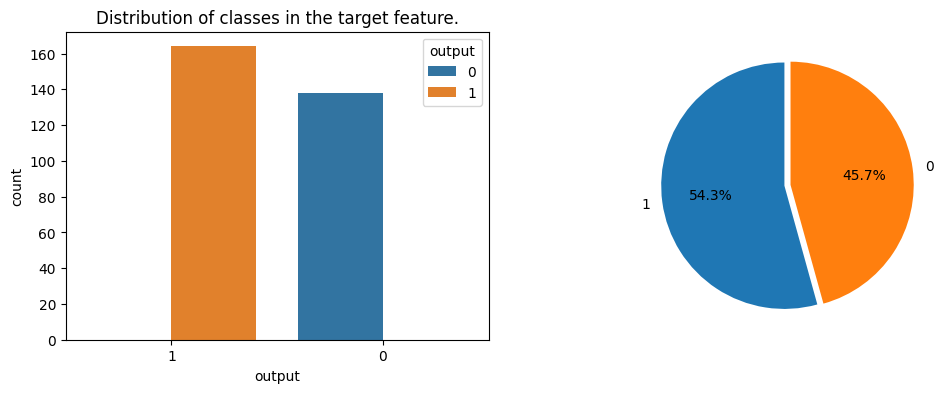

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df_cardiaque, x='output', order=df_cardiaque['output'].value_counts().index, hue='output')
plt.title('Distribution of classes in the target feature.')


plt.subplot(1, 2, 2)
data = df_cardiaque['output'].value_counts()
plt.pie(data, explode=((0, 0.05)), labels=data.index , startangle=90, autopct='%1.01f%%');


<font color=green> ***Interpretation <font/>:***

The classes are relatively close in size, which is a good sign of balance. Class 2 is slightly more represented, but the difference is not significant. We can be confident that during training, the model will not favor one class over the other.

#### Distribution of numerical variables

<Figure size 1000x800 with 0 Axes>

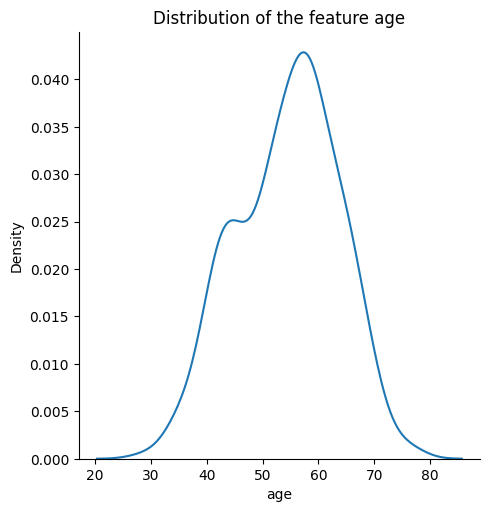

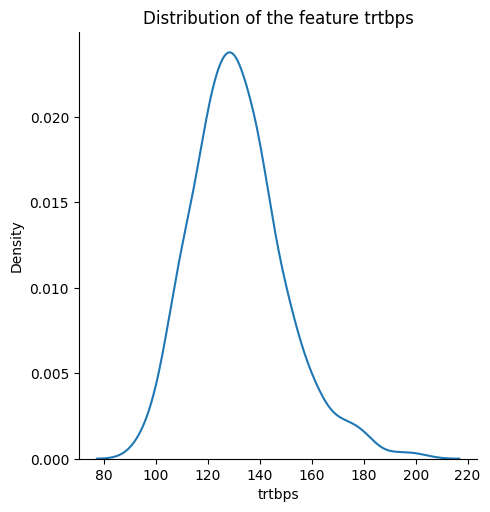

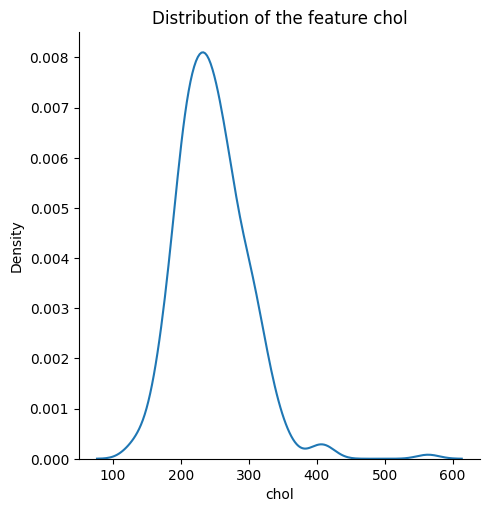

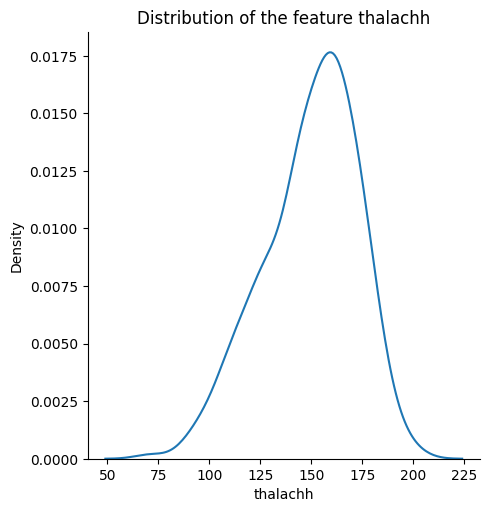

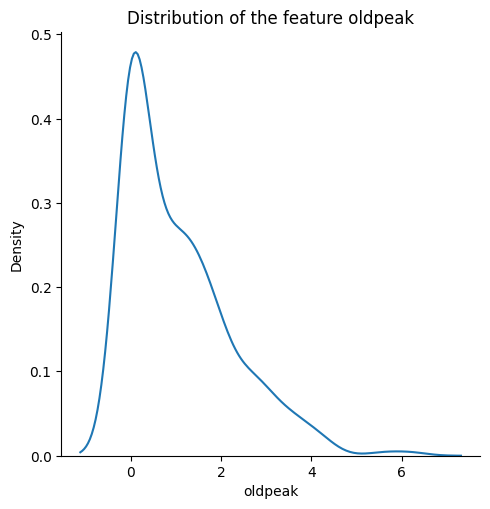

In [12]:
numerical_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
plt.figure(figsize=(10, 8))

for i in range(0, len(numerical_cols)):
    sns.displot(data=df_cardiaque[numerical_cols[i]], kind='kde')
    plt.title(f"Distribution of the feature {numerical_cols[i]}")


<font color=green> ***Interpretation:*** </font> 
- Except for the feature oldpeak, all other features have symmetric distributions. This already gives us an idea of the normalization technique to use on these variables (either StandardScaler or RobustScaler).

### 3- Data preprocessing

#### 3.1- Outlier handling

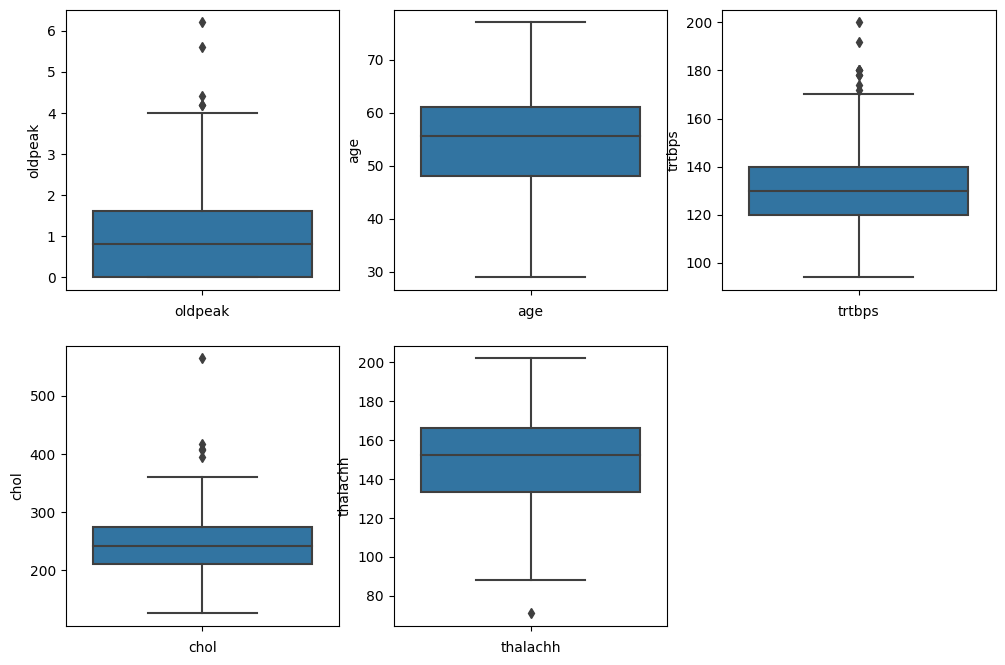

In [13]:
fig = plt.figure(figsize=(12,8))

num_rows = 2
num_cols = 3

for i in range(len(numerical_cols)):
    
    fig.add_subplot(num_rows, num_cols, i+1)
    ax = sns.boxplot(data=df_cardiaque, y=numerical_cols[i-1])
    ax.set_xlim()
    plt.xlabel(numerical_cols[i-1])

<font color=green> ***Interpretations:*** </font>
- We observe the presence of outliers in these box plots.
- Although it is normal to have outliers in any distribution, we need to analyze them to determine whether they are errors or not in the dataset.

### Let's identify whether these outliers are errors or actual values.

For each feature, we will identify and extract from the dataset the observations where the value of that feature is considered an outlier. We will use the z-score, which calculates the distance of a point from the mean. If the z-score of a point is less than -3 or greater than 3, it is considered an outlier.

In [14]:
numerical_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [15]:
from scipy.stats import zscore

##### For the feature **oldpeak**:

In [16]:
 df_cardiaque[abs(zscore(df_cardiaque["oldpeak"])) >= 3]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


##### For the feature **trtbps**:

In [17]:
 df_cardiaque[abs(zscore(df_cardiaque["trtbps"])) >= 3]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


##### For the feature **chol**:

In [18]:
 df_cardiaque[abs(zscore(df_cardiaque["chol"])) >= 3]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


<font color=green> **Interpretation:** </font>
It seems that these values are actual values and not errors. We will keep them in the dataset.

# Partie II: Feature selection and preprocessing

In [19]:
df_copie = df_cardiaque.copy()

### II- 1 Feature selection

For feature selection to provide to future models, we will rely on a dependency-based variable selection technique. Since our target is categorical:

1. For continuous numeric variables, we will use the ANOVA test.
2. For categorical variables, we will use the Chi-squared test.
3. Finally, we will check if there are any two features that are strongly correlated with each other. If so, we will retain only one of them.

In [20]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#### 1.1 Selection of categorical features: Chi-squared test.

In [21]:
categorical_cols = list(set(df_cardiaque.columns) - set(numerical_cols) - set(["output"]))
categorical_cols

['slp', 'restecg', 'cp', 'caa', 'thall', 'exng', 'sex', 'fbs']

In [22]:
X_cat, y = df_copie[categorical_cols], df_copie["output"]
chi2_score, p_values = chi2(X_cat, y )

In [23]:
# Conversion of categorical_cols to Numpy array in order to perform boolean indexing
categorical_cols = np.array(categorical_cols)
cat_features_selected = categorical_cols[p_values <= 0.05]
print(f"The selected categorical features:  {cat_features_selected}")

The selected categorical features:  ['slp' 'cp' 'caa' 'thall' 'exng' 'sex']


#### 1.2 Selection of numerical features: ANOVA test.

In [24]:
X_num, y = df_copie[numerical_cols], df_copie["output"]

In [25]:
f_statistic, p_values = f_classif(X_num, y)
f_statistic, p_values 

(array([15.47451133,  6.55867635,  2.00288848, 64.2377925 , 67.72193074]),
 array([1.03948373e-04, 1.09265389e-02, 1.58036975e-01, 2.47614605e-14,
        5.81456695e-15]))

In [26]:
numerical_cols = np.array(numerical_cols)
num_features_selected = numerical_cols[p_values <= 0.05]
print(f"The selected numerical features:  {num_features_selected}")

The selected numerical features:  ['age' 'trtbps' 'thalachh' 'oldpeak']


In [27]:
features_selected = np.concatenate([num_features_selected, cat_features_selected])
features_selected

array(['age', 'trtbps', 'thalachh', 'oldpeak', 'slp', 'cp', 'caa',
       'thall', 'exng', 'sex'], dtype='<U8')

In [28]:
final_df = df_copie[features_selected]
final_df.head()

,age,trtbps,thalachh,oldpeak,slp,cp,caa,thall,exng,sex
0,63,145,150,2.3,0,3,0,1,0,1
1,37,130,187,3.5,0,2,0,2,0,1
2,41,130,172,1.4,2,1,0,2,0,0
3,56,120,178,0.8,2,1,0,2,0,1
4,57,120,163,0.6,2,0,0,2,1,0


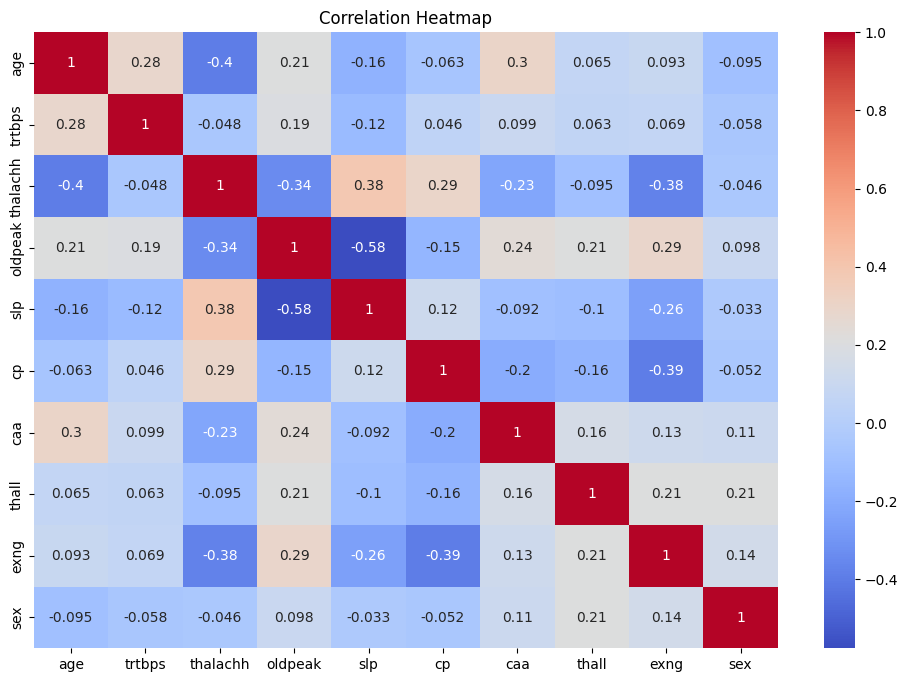

In [29]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<font color=green> **Interpretation:** </font>
There are no two features among the selected features that are strongly correlated. If that were the case, we would have retained only one.

Before splitting the data, we will perform a transformation on the feature **sex**. As it is represented in the dataset, it is considered as an ordinal qualitave variable, however, there is no ordinal relationship between the values taken by this feature. For example, M(0) is neither greater than nor less than F(1). We need to apply a different encoding to this feature, OneHot encoding or Dummy encoding.

In [30]:
final_df = pd.get_dummies(final_df, columns=["sex"])
final_df["output"] = df_copie["output"]
final_df.head()

,age,trtbps,thalachh,oldpeak,slp,cp,caa,thall,exng,sex_0,sex_1,output
0,63,145,150,2.3,0,3,0,1,0,False,True,1
1,37,130,187,3.5,0,2,0,2,0,False,True,1
2,41,130,172,1.4,2,1,0,2,0,True,False,1
3,56,120,178,0.8,2,1,0,2,0,False,True,1
4,57,120,163,0.6,2,0,0,2,1,True,False,1


### II- 2 Splitting the dataset

In [31]:
X, y = final_df.drop(columns=["output"]), final_df["output"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, stratify=y)

In [34]:
print(f"X_train: {X_train.shape} ")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (226, 11) 
y_train: (226,)
X_test: (76, 11)
y_test: (76,)


### II- 3 Standardisation

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [36]:
scaler = StandardScaler()

# Partie III: Modeling

In [37]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# Les métrics
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay, accuracy_score

In [38]:
lr = LogisticRegression(random_state=42)
lsvc = LinearSVC(random_state=42)
svc = SVC(kernel="rbf", C=8.0)
rf = RandomForestClassifier(criterion='gini', max_depth=30, min_samples_split=2, n_estimators=50, random_state=42)
knn = KNeighborsClassifier(n_neighbors=15)
sgd = SGDClassifier()

#### Helper functions

In [39]:
def metric(y_test,y_pred, plot_confusion_matrice=False):
    score = round(accuracy_score(y_test,y_pred),2)*100 
   
    if plot_confusion_matrice == True:
        ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
        plt.title("Confusion matrix for prediction made on test set")
        plt.show()
        
    #print(classification_report(y_test, y_pred))
    
    return score

In [40]:
def train_and_evaluate_model(model, plot_confusion_matrice=False, scaler=scaler, 
                             X_taint=X_train, y_train=y_train,
                             X_test=X_test, y_test=y_test):
    
    model.fit(X_train,y_train)
    train_score = metric(y_train, model.predict(X_train))
    test_score = metric(y_test, model.predict(X_test), plot_confusion_matrice)
    print(f"Test accuracy score: {test_score}")
    return train_score, test_score

### III-1  Train Models

In [41]:
model_names = []
train_accuracy_score = []
test_accuracy_score = []

#### Logistic Regression

In [42]:
pipe_lr = Pipeline(steps=[ ("preprocesing", scaler),
                            ("model", lr) ])
scores = train_and_evaluate_model(pipe_lr)

# Save informations
model_names.append("Logistic Regression")
train_accuracy_score.append(scores[0])
test_accuracy_score.append(scores[1])

Test accuracy score: 78.0


#### SVC

In [43]:
pipe_svc = Pipeline(steps=[ ("preprocesing", scaler),
                            ("model", svc) ])
scores = train_and_evaluate_model(pipe_svc)

# Save informations
model_names.append("SVC")
train_accuracy_score.append(scores[0])
test_accuracy_score.append(scores[1])

Test accuracy score: 80.0


#### Linear SVC

In [44]:
pipe_lsvc = Pipeline(steps=[ ("preprocesing", scaler),
                            ("model", lsvc) ])
scores = train_and_evaluate_model(pipe_lsvc)

# Save informations
model_names.append("Linear SVC")
train_accuracy_score.append(scores[0])
test_accuracy_score.append(scores[1])

Test accuracy score: 78.0


### Random Forest

In [45]:
pipe_rf = Pipeline(steps=[ ("preprocesing", scaler),
                            ("model", rf) ])
scores = train_and_evaluate_model(pipe_rf)

# Save informations
model_names.append("Random Forest")
train_accuracy_score.append(scores[0])
test_accuracy_score.append(scores[1])

Test accuracy score: 79.0


### Voting Classifier

In [46]:
pipe_vt = Pipeline(steps=[("preprocesing", scaler),
                          ("model", VotingClassifier(estimators=[('lr',lr),('svc',svc),('lsvc', lsvc)],voting='hard'))])
scores = train_and_evaluate_model(pipe_vt)

# Save informations
model_names.append("Voting Classifier")
train_accuracy_score.append(scores[0])
test_accuracy_score.append(scores[1])

Test accuracy score: 78.0


#### KNN classifier

In [47]:
pipe_knn = Pipeline(steps=[ ("preprocesing", scaler),
                            ("model", knn)])
scores = train_and_evaluate_model(pipe_knn)

# Save informations
model_names.append("KNN Classifier")
train_accuracy_score.append(scores[0])
test_accuracy_score.append(scores[1])

Test accuracy score: 82.0


#### SGD Classifier

In [48]:
pipe_sgd = Pipeline(steps=[ ("preprocesing", scaler),
                            ("model", sgd) ])
scores = train_and_evaluate_model(pipe_sgd)

# Save informations
model_names.append("SGD Classifier")
train_accuracy_score.append(scores[0])
test_accuracy_score.append(scores[1])

Test accuracy score: 72.0


In [49]:
data = {'models': model_names,
        'train_accuracy_score': train_accuracy_score,
        'test_accuracy_score': test_accuracy_score}
df =pd.DataFrame(data)
df["difference_train_test_score"] = abs(df["train_accuracy_score"] - df["test_accuracy_score"])

# Sorted by colomn difference_train_test_score
df.sort_values(by='difference_train_test_score',ascending=True)

,models,train_accuracy_score,test_accuracy_score,difference_train_test_score
5,KNN Classifier,85.0,82.0,3.0
2,Linear SVC,86.0,78.0,8.0
0,Logistic Regression,87.0,78.0,9.0
4,Voting Classifier,87.0,78.0,9.0
6,SGD Classifier,83.0,72.0,11.0
1,SVC,96.0,80.0,16.0
3,Random Forest,100.0,79.0,21.0


### III-2 Learning curve

In [50]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import  learning_curve

#### KNN

Text(0.5, 1.0, 'KNN: Learning cruve')

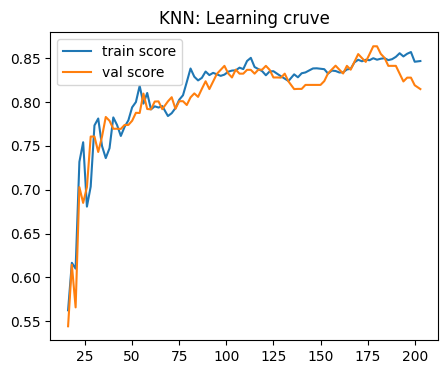

In [51]:
N, train_score, val_score = learning_curve(pipe_knn, X_train, y_train, cv=StratifiedKFold(10),
                                              scoring="accuracy", train_sizes=np.linspace(0.01, 1, 100))
plt.figure(figsize=(5, 4))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='val score')
plt.legend()
plt.title("KNN: Learning cruve")

### III-3 Searching for the best parameters

In [52]:
params_grid_knn = {"model__n_neighbors": [ i for i in range(3, 20)], 
                   "model__weights":["uniform", "distance"],
                   "model__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [53]:
# 3) 
#define gridSearh 
grid_search = GridSearchCV(pipe_knn, params_grid_knn, cv=StratifiedKFold(20), n_jobs=-1, verbose=1 )

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Accuracy: ", accuracy)

Fitting 20 folds for each of 136 candidates, totalling 2720 fits
Best hyperparameters:  {'model__algorithm': 'auto', 'model__n_neighbors': 18, 'model__weights': 'uniform'}
Accuracy:  0.8026315789473685


In [54]:
best_model = grid_search.best_estimator_

#### Let's evaluate the best model.

In [55]:
scores = train_and_evaluate_model(best_model)
print(f"Train accuracy score: {scores[0]}")

Test accuracy score: 80.0
Train accuracy score: 85.0


In [56]:
X_test.head()

,age,trtbps,thalachh,oldpeak,slp,cp,caa,thall,exng,sex_0,sex_1
223,56,200,133,4.0,0,0,2,3,1,True,False
236,58,125,171,0.0,2,0,2,3,0,False,True
240,70,160,112,2.9,1,2,1,3,1,False,True
255,45,142,147,0.0,1,0,3,3,1,False,True
287,57,154,164,0.0,2,1,1,2,0,False,True


In [57]:
X_test, y_test = X_test.reset_index(drop=True), y_test.reset_index(drop=True)

In [58]:
random_index = np.random.randint(X_test.index.min(), X_test.index.max())
X = X_test.loc[X_test.index==random_index, :]

print(f"Predicted class: {best_model.predict(X)[0]}")
print(f"Actual class: {y_test.loc[y_test.index==random_index].values[0]}")

Predicted class: 1
Actual class: 1


For future analysis, it would be interesting to:

1. Perform feature engineering to create new features that might improve the model
2. Investigate the impact of O2 saturation levels on heart attack prediction


What do you think would be useful to explore next? Let me know in the comments.